In [186]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib widget

In [187]:
file = open("./input.txt", "r")
input = file.read().split('\n')

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …
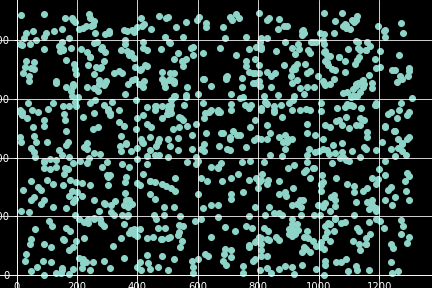

In [188]:
x, y = [], []
for line in input:
    if line.__contains__(','):
        coords = [int(i) for i in line.split(',')]
        x.append(coords[0])
        y.append(coords[1])
x = np.array(x)
y = np.array(y)

fig = plt.figure()
ax=fig.add_axes([0,0,1,1])
ax.set_ylabel("y")
ax.set_xlabel('x axis')
ax.scatter(x, y)
ax.set_title('scatter plot')
ax.spines['top'].set_color('none')
ax.spines['bottom'].set_position('zero')
ax.spines['left'].set_position('zero')
ax.spines['right'].set_color('none')
plt.grid()

952
952


Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …
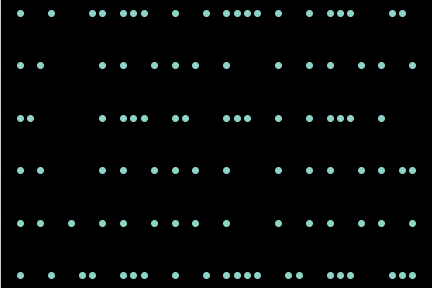

In [189]:
folds = [f.split(' ')[-1].split('=') for f in input if f.__contains__('fold')]
for first_fold in folds:
    fold_index = int(first_fold[-1])
    indices_to_remove = []
    remove= set()
    if first_fold[0] == 'x':
        hits = [(i, xxx) for i, xxx in enumerate(np.where(x >= fold_index, x, -1)) if xxx != -1]
        for hit in hits:
            coord = (hit[-1], y[hit[0]])
            diff = fold_index - coord[0]
            new_x = fold_index + diff
            coord = (new_x, coord[-1])
            for ix, old_x in enumerate(x):
                if old_x == new_x and y[ix] == coord[-1] and ix != hit[0]:
                    remove.add(ix)
            remove.add(hit[0])
            x = np.append(x, coord[0])
            y = np.append(y, coord[-1])
    if first_fold[0] == 'y':
        hits = [(i, yyy) for i, yyy in enumerate(np.where(y >= fold_index, y, -1)) if yyy != -1]
        for hit in hits:
            coord = (x[hit[0]], hit[-1])
            diff = fold_index - coord[-1]
            new_y = fold_index + diff
            coord = (coord[0], new_y)
            for iy, old_y in enumerate(y):
                if old_y == new_y and iy != len(x) and x[iy] == coord[0] and iy != hit[0]:
                    remove.add(iy)
            remove.add(hit[0])
            x = np.append(x, coord[0])
            y = np.append(y, coord[-1])

    x = np.delete(x, list(remove))
    y = np.delete(y, list(remove))

ax.clear()
# print(set(x))
# print(set(y))
plt.scatter(x, y)
plt.gca().invert_yaxis()
plt.show()

        